# Data Loading

In [1]:
!wget https://www.dropbox.com/s/ey36d900mjru46e/AIFORTHAI-LST20Corpus.tar.gz
!tar xvzf AIFORTHAI-LST20Corpus.tar.gz
!pip install pytictoc

Streaming output truncated to the last 5000 lines.
LST20_Corpus/train/._T10566.txt
LST20_Corpus/train/T10566.txt
LST20_Corpus/train/._T00775.txt
LST20_Corpus/train/T00775.txt
LST20_Corpus/train/._T12417.txt
LST20_Corpus/train/T12417.txt
LST20_Corpus/train/._T12403.txt
LST20_Corpus/train/T12403.txt
LST20_Corpus/train/._T10214.txt
LST20_Corpus/train/T10214.txt
LST20_Corpus/train/._T01319.txt
LST20_Corpus/train/T01319.txt
LST20_Corpus/train/._T00761.txt
LST20_Corpus/train/T00761.txt
LST20_Corpus/train/._T01457.txt
LST20_Corpus/train/T01457.txt
LST20_Corpus/train/._T00991.txt
LST20_Corpus/train/T00991.txt
LST20_Corpus/train/._T11644.txt
LST20_Corpus/train/T11644.txt
LST20_Corpus/train/._T00749.txt
LST20_Corpus/train/T00749.txt
LST20_Corpus/train/._T13053.txt
LST20_Corpus/train/T13053.txt
LST20_Corpus/train/._T11122.txt
LST20_Corpus/train/T11122.txt
LST20_Corpus/train/._T01331.txt
LST20_Corpus/train/T01331.txt
LST20_Corpus/train/._T10228.txt
LST20_Corpus/train/T10228.txt
LST20_Corpus/train/

In [2]:
# Import library
import pandas as pd
import numpy as np
import io
import re
import os,glob
from collections import Counter

In [3]:
from pytictoc import TicToc
t = TicToc()

In [4]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
#Reference: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
f = open('LST20_Corpus/genres.txt', 'r')
genre = {}
for row_num, line in enumerate(f):
    values = line.strip().split('\t')
    genre[values[0]] = values[1]

In [6]:
len(genre)

4751

In [7]:
dataset = ['test','train','eval']
data = pd.DataFrame(dict({'Doc':[], 'filename':[], 'genre':[]}), dtype=int)
for ds in dataset:
  folder_path = 'LST20_Corpus/' + ds
  folder_path_len = len(folder_path)
  for filepath in glob.glob(os.path.join(folder_path, '*.txt')):
    filename = filepath[len(folder_path)-len(filepath)+1:]
    with open(filepath, 'r', encoding='utf-8') as f:
      Doc = []
      for row_num, line in enumerate(f):
        values = line.strip().replace(u'\xa0', u' ').split('\t')
        if values[0] == '_' or values[0] == '':
          Doc.append(' ')
        else:
          Doc.append(values[0])
      Doc = ''.join(Doc)
      data = data.append({'Doc':Doc, 'filename': filename, 'genre': genre[filename]}, ignore_index=True)

In [8]:
data.head()

,Doc,filename,genre
0,ศาลรับรูดบัตรเครดิตประกันตัวคดีอาญา ศาลไฮเทครั...,T13064.txt,C&A
1,"""หม่ำ""เพื่อบ้านเกิดฉาก""บุญบั้งไฟ"" หม่ำ จ๊กมก ผ...",T12721.txt,entertainment
2,"เคลียร์ข่าวเกาเหลา ""พิงค์กี้"" ""แพนเค้ก"" ปัดงอน...",T12479.txt,entertainment
3,ตรวจเข้มชายแดนหวั่นทีมยิง'สนธิ'ออกนอกปท. ผู้สื...,T12365.txt,sports
4,นายกฯ เตรียมสนับสนุนงบ กว่า 700 ล้านบาท สนับสน...,T12836.txt,economics


In [9]:
data.describe()

,Doc,filename,genre
count,4751,4751,4751
unique,4751,4751,16
top,โปรสาวบ่นอุบยูเอสเจาะธงสุดโหด ชอย นา-ยอน สาววั...,T11303.txt,politics
freq,1,1,1473


In [10]:
data['Doc'][0]

'ศาลรับรูดบัตรเครดิตประกันตัวคดีอาญา ศาลไฮเทครับบัตรเครดิตชำระแทนเงินสดในคดีอาญา ที่ศาลอาญา ศาลอาญากรุงเทพใต้ ศาลอาญาธนบุรี ศาลแขวงพระนครเหนือ เผยมีแค่บัตรเครดิตก็รูดประกันตัวได้ เตรียมขยายบริการทั่วประเทศ ด้านเลขาธิการสภาทนายความขานรับ ใช้บัตรเครดิตประกันตัวจำเลยหรือเสียค่าปรับได้ ระบุเป็นการเปิดช่องทางเพิ่ม และเป็นการอำนวยความสะดวกให้จำเลยในการได้รับอิสรภาพ นายสราวุธ เบญจกุล รองเลขาธิการสำนักงานศาลยุติธรรม เปิดเผยว่า ตามที่ศาลยุติธรรมเริ่มนำระบบบัตรเครดิต มาใช้กับการชำระค่าธรรมเนียมศาลในคดีแพ่งไปแล้วนั้น ศาลยุติธรรมยังเห็นว่า กรณีประชาชนที่ไม่สามารถนำเงินสดมาชำระค่าปรับในคดีอาญา หรือวางเงินสดประกันตัวผู้ต้องหาหรือจำเลย ทำให้เดือดร้อนต้องวิ่งยืมเงินหรือหาเช่าโฉนด บัดนี้ศาลยุติธรรมรับบัตรเครดิตชำระแทนเงินสดในคดีอาญาแล้ว อาทิเช่น ศาลอาญา ศาลอาญากรุงเทพใต้ ศาลอาญาธนบุรี ศาลแขวงพระนครเหนือดังนั้น จึงไม่ต้องกังวลอีกต่อไป เพียงมีบัตรเครดิตก็ใช้ได้ทันที และจะขยายบริการนี้ไปยังทุกศาลทั่วประเทศ เพื่อให้สอดคล้องกับนโยบายของนายวิรัช ลิ้มวิชัย ประธานศาลฎีกา ที่ต้องการให้ประชาชนได้รับบริการความยุต

In [11]:
genre_count = Counter(data['genre'])

In [12]:
genre_count

Counter({'C&A': 697,
         'STE': 272,
         'culture': 43,
         'development': 53,
         'disaster': 54,
         'economics': 602,
         'entertainment': 527,
         'environment': 45,
         'general': 80,
         'health': 97,
         'inter': 1,
         'international': 285,
         'politics': 1473,
         'royal': 57,
         'sports': 427,
         'weather': 38})

In [13]:
data[data['genre'] == 'inter']

,Doc,filename,genre
129,ประชุมสุดยอดกลุ่มปท.ไม่ฝักใฝ่ฝ่ายใด ผู้นำเรียง...,T12401.txt,inter


In [14]:
data.loc[408][0]

'คนร้ายขี่จยย.ปาหินใส่เก๋งหวังชิงทรัพย์ 2 คนร้ายขี่จยย.ประกบปาหินก้อนใหญ่ใส่เก๋งหนุ่มกู้ภัยศรีราชา กระจกแตกถูกแฟนสาวเจ็บ รถเสียหลักคนร้ายขี่จยย.ย้อนกลับหวังชิงทรัพย์ แต่โชคดีคนขับได้สติบึ่งรถหนีโทรแจ้งตำรวจ เมื่อเวลา 01.30 น.วันที่ 25 กรกฎาคม พ.ต.ท.สมบัติ โสภาพ สารวัตรเวรสภ.หนองขาม อ.ศรีราชา จ.ชลบุรี ได้รับแจ้งจากศูนย์วิทยุหน่วยกู้ภัยสว่างประทีปศรีราชาว่ามีรถยนต์เก๋งของอาสาสมัครหน่วยกู้ภัยถูกคนร้ายใช้ก้อนหินขนาดใหญ่ทุ่มที่บริเวณกระจกหน้ารถจนยุบเป็นรอยขนาดใหญ่ที่บริเวณถนนสายเครือสหพัฒน์-บึง หมู่ 5 ต.บึง อ.ศรีราชา จ.ชลบุรี เจ้าของรถและแฟนสาวได้รับบาดเจ็บจากเศษกระจกที่แตกกระจายกระเด็นใส่แขนและขาเป็นรอย จึงเดินทางไปตรวจสอบ ที่เกิดเหตุเจ้าหน้าที่ตำรวจพบก้อนหินขนาดใหญ่หล่นอยู่และที่บริเวณกระจกด้านหน้ารถยนต์เก๋งยี่ห้อมิตซูบิชิแลนเซอร์สีบรอนหมายเลขทะเบียน กย-2750 ชลบุรี เป็นรอยขนาดใหญ่ยุบลงไปช่วงกลางกระจกและเศษกระจกเกลื่อนที่บริเวณฝากระโปรงและในรถยนต์ และผู้ที่ได้รับบาดเจ็บ 1 รายที่โดนเศษกระจกบาดตามแขนขาและลำตัวถูกนำส่งโรงพยาบาลอ่าวอุดมเพื่อให้แพทย์รักษาบาดแผลคือน.ส.สาวิตรี พรมวงษ์ อายุ 20 ปี 

In [15]:
data.loc[408][2] = 'international'

In [16]:
genre_count = Counter(data['genre'])

In [17]:
genre_count

Counter({'C&A': 696,
         'STE': 272,
         'culture': 43,
         'development': 53,
         'disaster': 54,
         'economics': 602,
         'entertainment': 527,
         'environment': 45,
         'general': 80,
         'health': 97,
         'inter': 1,
         'international': 286,
         'politics': 1473,
         'royal': 57,
         'sports': 427,
         'weather': 38})

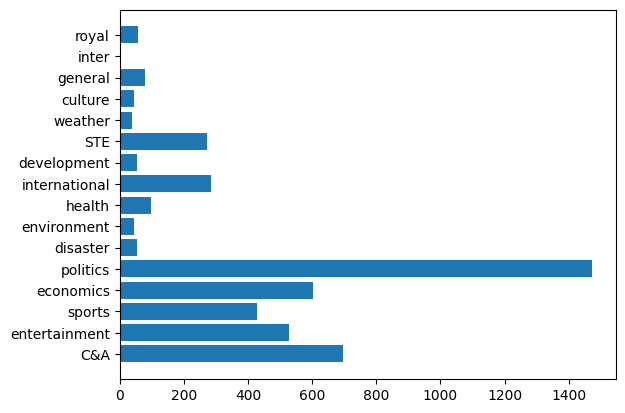

In [18]:
plt.rcdefaults()
fig, ax = plt.subplots()

labels, values = zip(*genre_count.items())
y_pos = np.arange(len(labels))

ax.barh(y_pos, values, align='center')
_ = ax.set_yticks(y_pos)
_ = ax.set_yticklabels(labels)

# Segmentation

In [19]:
!pip install pythainlp
!pip install marisa_trie
!pip install deepcut
!pip install PyICU

     |████████████████████████████████| 11.0MB 7.7MB/s 
     |████████████████████████████████| 747kB 43.3MB/s 
     |████████████████████████████████| 276kB 8.4MB/s 
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp37-cp37m-linux_x86_64.whl size=860712 sha256=9b7cdb59b56eb66e02b64f33455c72275ff1079c78063a79444f59588ae53ef8
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built marisa-trie
     |████████████████████████████████| 2.0MB 8.3MB/s 
     |████████████████████████████████| 307kB 8.5MB/s 
  Created wheel for PyICU: filename=PyICU-2.7.4-cp37-cp37m-linux_x86_64.whl size=1374431 sha256=e93efb624c029b10f9572dc5a87ff031800e1e81a063a0811312999e0d22c31a
  Stored in directory: /root/.cache/pip/wheels/1e/86/14/44874b2d8ecf81ca9beb8807b7a9a00d6eeeed7d0c7d94c793
Successfully built PyICU


In [20]:
from pythainlp.corpus.common import thai_words
from marisa_trie import Trie
from pythainlp.util import dict_trie
from pythainlp.tokenize import word_tokenize

data_word = data.copy(deep=True)

for k, v in enumerate(data_word['Doc']):
  data_word['Doc'][k] = word_tokenize(data_word['Doc'][k], engine='newmm')  # engine='deepcut'

In [21]:
data_word.head()

,Doc,filename,genre
0,"[ศาล, รับ, รูด, บัตรเครดิต, ประกันตัว, คดีอาญา...",T13064.txt,C&A
1,"["", หม่ำ, "", เพื่อ, บ้านเกิด, ฉาก, "", บุญ, บั้...",T12721.txt,entertainment
2,"[เคลียร์, ข่าว, เกาเหลา, , "", พิง, ค์, กี้, ""...",T12479.txt,entertainment
3,"[ตรวจ, เข้ม, ชายแดน, หวั่น, ทีม, ยิง, ', สนธิ,...",T12365.txt,sports
4,"[นายกฯ, , เตรียม, สนับสนุน, งบ, , กว่า, , 7...",T12836.txt,economics


In [22]:
from pythainlp.tokenize import syllable_tokenize

data_syl = data.copy(deep=True)

for k, v in enumerate(data_syl['Doc']):
  data_syl['Doc'][k] = syllable_tokenize(data_syl['Doc'][k])

## Investigate data set

In [23]:
# genre_count = Counter(data_syl['genre'])

In [24]:
# genre_count

In [25]:
# plt.rcdefaults()
# fig, ax = plt.subplots()

# labels, values = zip(*genre_count.items())
# y_pos = np.arange(len(labels))

# ax.barh(y_pos, values, align='center')
# _ = ax.set_yticks(y_pos)
# _ = ax.set_yticklabels(labels)

In [26]:
# np.array([len(i) for i in data_syl['Doc']]).mean()
# data_syl['Doc']

# Split Data

In [27]:
from sklearn.model_selection import train_test_split

# Split data to train 80%, valiadation 10%, test 10%.

f_train = 0.8
f_val = 0.1
f_test = 1 - f_train - f_val
f_test2val = f_test / (f_val + f_test)

# Train + (Validation + Test)
X_word_train, X_word_val_test, X_syl_train, X_syl_val_test, y_train, y_val_test = train_test_split(data_word['Doc'], data_syl['Doc'], data_word['genre'], test_size=(f_test+f_val), random_state=42)

# Validation + Test
X_word_val, X_word_test, X_syl_val, X_syl_test, y_val, y_test = train_test_split(X_word_val_test, X_syl_val_test, y_val_test, test_size=f_test2val, random_state=42)

# Building model

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
def dummy(doc):
    return doc

n_class = len(data_syl['genre'].unique())
unique_class = data_syl['genre'].unique()

## 1. Multinomial Naive Bayes Classifier (MNB)

In [ ]:
def MNB_pipeline():
  MNB_pipeline = Pipeline([('vect', CountVectorizer(tokenizer=dummy, preprocessor=dummy)),
                         ('tfidf', TfidfTransformer()),
                         ('mnb', MultinomialNB())])
  return MNB_pipeline

print('Start')
t.tic()
MNB_pipeline_word = MNB_pipeline()
MNB_pipeline_word.fit(X_word_train, y_train)
t.toc()
print('End for MNB_pipeline_word model')

t.tic()
MNB_pipeline_syl = MNB_pipeline()
MNB_pipeline_syl.fit(X_syl_train, y_train)
t.toc()
print('End for MNB_pipeline_syl model')

Start
Elapsed time is 1.240847 seconds.
End for MNB_pipeline_word model
Elapsed time is 1.423397 seconds.
End for MNB_pipeline_syl model


In [ ]:
y_MNB_word_predict = MNB_pipeline_word.predict(X_word_test)
y_MNB_syl_predict = MNB_pipeline_syl.predict(X_word_test)

In [ ]:
print(accuracy_score(y_test, y_MNB_word_predict))
print(f1_score(y_test, y_MNB_word_predict, average='weighted'))

0.5168067226890757
0.4716986451639118


In [ ]:
print(accuracy_score(y_test, y_MNB_syl_predict))
print(f1_score(y_test, y_MNB_syl_predict, average='weighted'))

0.3907563025210084
0.30137149716633266


Normalized confusion matrix


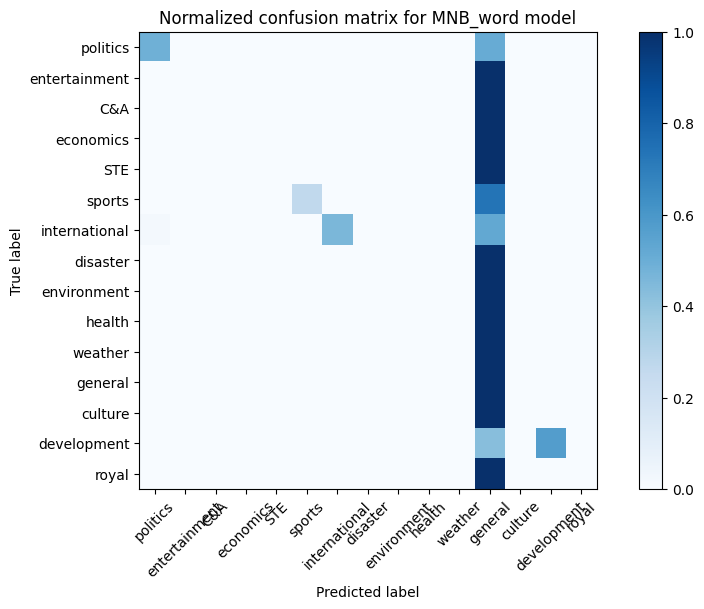

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_MNB_word_predict)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for MNB_word model')

plt.show()

Normalized confusion matrix


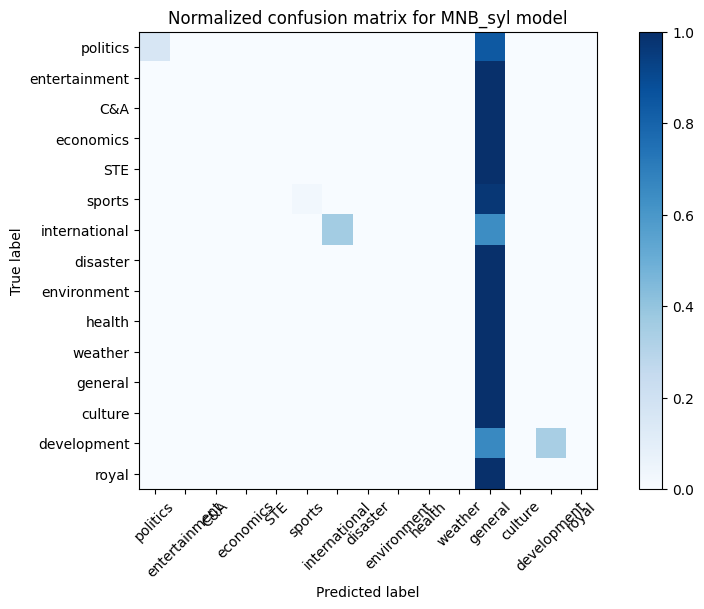

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_MNB_syl_predict)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for MNB_syl model')

plt.show()

## 2. Support Vector Machine (SVM)

In [ ]:
from sklearn import model_selection, naive_bayes, svm

In [ ]:
def SVM_pipeline():
  SVM_pipeline = Pipeline([('vect', CountVectorizer(tokenizer=dummy, preprocessor=dummy)),
                         ('tfidf', TfidfTransformer()),
                         ('svm', svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))])
  return SVM_pipeline

print('Start')
t.tic()
SVM_pipeline_word = SVM_pipeline()
SVM_pipeline_word.fit(X_word_train, y_train)
t.toc()
print('End for SVM_pipeline_word model')

t.tic()
SVM_pipeline_syl = SVM_pipeline()
SVM_pipeline_syl.fit(X_syl_train, y_train)
t.toc()
print('End for SVM_pipeline_syl model')

Start
Elapsed time is 31.161057 seconds.
End for SVM_pipeline_word model
Elapsed time is 27.583353 seconds.
End for SVM_pipeline_syl model


In [ ]:
y_SVM_word_predict = SVM_pipeline_word.predict(X_word_test)
y_SVM_syl_predict = SVM_pipeline_syl.predict(X_word_test)

In [ ]:
print(accuracy_score(y_test, y_SVM_word_predict))
print(f1_score(y_test, y_SVM_word_predict, average='weighted'))

0.8214285714285714
0.7977576334931658


In [ ]:
print(accuracy_score(y_test, y_SVM_syl_predict))
print(f1_score(y_test, y_SVM_syl_predict, average='weighted'))

0.7247899159663865
0.6809606258464801


Normalized confusion matrix


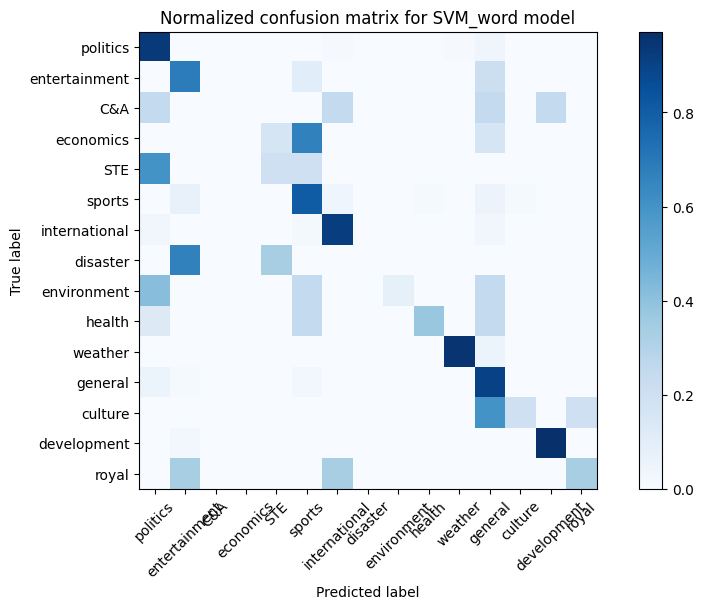

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_SVM_word_predict)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for SVM_word model')

plt.show()

Normalized confusion matrix


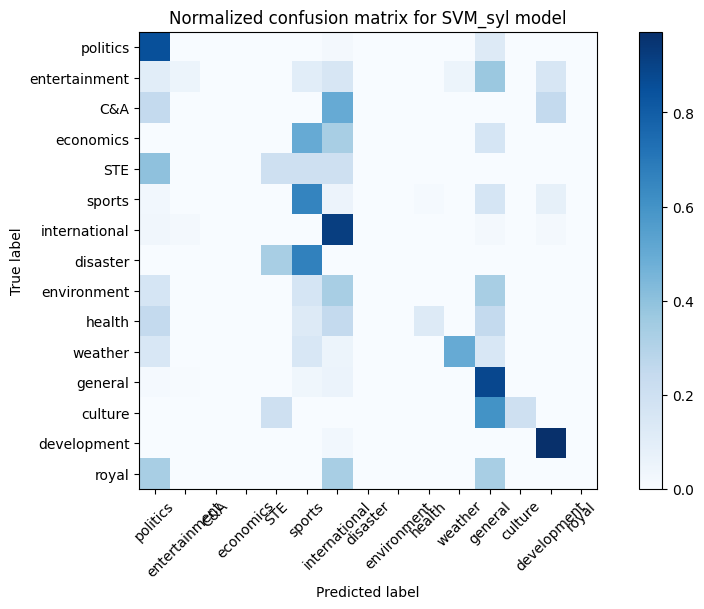

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_SVM_syl_predict)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for SVM_syl model')

plt.show()

## 3. LSTM

### Pre-processing input for neural network

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, TimeDistributed, LSTM, Bidirectional, GRU, Conv1D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.utils.np_utils import to_categorical

In [30]:
len_percentile = 80

word_len_list = np.array([len(i) for i in data_word['Doc']])
max_word_len = word_len_list.max()
p_word_len = np.percentile(word_len_list, len_percentile)
word_len = int(p_word_len)

syl_len_list = np.array([len(i) for i in data_syl['Doc']])
max_syl_len = syl_len_list.max()
p_syl_len = np.percentile(syl_len_list, len_percentile)
syl_len = int(p_word_len)

In [31]:
print(max_word_len)
print(p_word_len)

52338
783.0


In [32]:
print(max_syl_len)
print(p_syl_len)

76218
1098.0


In [33]:
seg_fraction = 1.0

# word segmentation
word_list = set([w for i in data_word['Doc'] for w in i])
n_word = int(seg_fraction * len(word_list))

# syllable segmentation
syl_list = set([w for i in data_syl['Doc'] for w in i])
n_syl = int(seg_fraction * len(syl_list))

In [34]:
word_tokenizer = Tokenizer(num_words = n_word)
word_tokenizer.fit_on_texts(data_word['Doc'])
word_map = word_tokenizer.word_index

syl_tokenizer = Tokenizer(num_words = n_syl)
syl_tokenizer.fit_on_texts(data_syl['Doc'])
syl_map = syl_tokenizer.word_index

In [35]:
# word_map
# dict(list(word_map.items())[:10])

In [36]:
X_word_nn_train = word_tokenizer.texts_to_sequences(X_word_train)
X_word_nn_val = word_tokenizer.texts_to_sequences(X_word_val)
X_word_nn_test = word_tokenizer.texts_to_sequences(X_word_test)
X_syl_nn_train = syl_tokenizer.texts_to_sequences(X_syl_train)
X_syl_nn_val = syl_tokenizer.texts_to_sequences(X_syl_val)
X_syl_nn_test = syl_tokenizer.texts_to_sequences(X_syl_test)

X_word_nn_train = pad_sequences(X_word_nn_train, maxlen=word_len, padding='post', truncating='post')
X_word_nn_val = pad_sequences(X_word_nn_val, maxlen=word_len, padding='post', truncating='post')
X_word_nn_test = pad_sequences(X_word_nn_test, maxlen=word_len, padding='post', truncating='post')
X_syl_nn_train = pad_sequences(X_syl_nn_train, maxlen=syl_len, padding='post', truncating='post')
X_syl_nn_val = pad_sequences(X_syl_nn_val, maxlen=syl_len, padding='post', truncating='post')
X_syl_nn_test = pad_sequences(X_syl_nn_test, maxlen=syl_len, padding='post', truncating='post')

In [37]:
# print(X_word_nn_train[:3])

In [38]:
X_word_nn_train = np.asarray(X_word_nn_train).astype(np.float32)
X_word_nn_val = np.asarray(X_word_nn_val).astype(np.float32)
X_word_nn_test = np.asarray(X_word_nn_test).astype(np.float32)
X_syl_nn_train = np.asarray(X_syl_nn_train).astype(np.float32)
X_syl_nn_val = np.asarray(X_syl_nn_val).astype(np.float32)
X_syl_nn_test = np.asarray(X_syl_nn_test).astype(np.float32)

In [39]:
# X_syl_nn_test

In [40]:
unique_genre = data_word['genre'].unique()
genre_2_num_map = dict(zip(unique_genre, range(len(unique_genre))))
num_2_genre_map = dict(zip(range(len(unique_genre)), unique_genre))

In [41]:
# num_2_genre_map

In [42]:
y_nn_train = np.vectorize(genre_2_num_map.get)(y_train)
y_nn_val = np.vectorize(genre_2_num_map.get)(y_val)
y_nn_test = np.vectorize(genre_2_num_map.get)(y_test)

y_nn_train = to_categorical(y_nn_train, num_classes=n_class)
y_nn_val = to_categorical(y_nn_val, num_classes=n_class)
y_nn_test = to_categorical(y_nn_test, num_classes=n_class)

### Model

In [43]:
def get_lstm(max_token, vocab_size):
  input1 = Input(shape=(max_token,))
  x = Embedding(vocab_size, 64, input_length=max_token, mask_zero=True)(input1)
  x = Conv1D(filters=100, kernel_size=5, strides=1, padding='same', activation='relu')(x)
  x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)
  # out = Dense(n_class, activation='softmax')(x)
  out = Dense(n_class, activation='sigmoid')(x)

  model = Model(inputs=input1, outputs=out)
  model.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['acc'])

  return model

weight_nn='./model_nn.h5'

callbacks_list_nn = [
      ModelCheckpoint(
          weight_nn,
          save_best_only=True,
          save_weights_only=True,
          monitor='val_loss',
          mode='min',
          verbose=1
      )
]

In [44]:
LSTM_model_word = get_lstm(word_len, n_word)
LSTM_model_word.summary()

# LSTM_model_word.load_weights('LSTM_model_word_wt.h5')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 783)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 783, 64)           2453952   
_________________________________________________________________
conv1d (Conv1D)              (None, 783, 100)          32100     
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 16)                1616      
Total params: 2,568,068
Trainable params: 2,568,068
Non-trainable params: 0
_________________________________________________________________


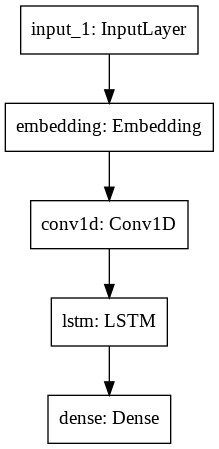

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(LSTM_model_word)

In [ ]:
epochs = 10
batch_size = 32

t.tic()
LSTM_model_word.fit(X_word_nn_train, y_nn_train, epochs=epochs, batch_size=batch_size, verbose=1,
                           callbacks=callbacks_list_nn,
                           validation_data=(X_word_nn_val, y_nn_val))
t.toc()

LSTM_model_word.save_weights('LSTM_model_word_wt.h5')

Epoch 1/10
119/119 [==============================] - 395s 3s/step - loss: 2.2908 - acc: 0.3023 - val_loss: 2.1463 - val_acc: 0.2905

Epoch 00001: val_loss improved from inf to 2.14631, saving model to ./model_nn.h5
Epoch 2/10
119/119 [==============================] - 393s 3s/step - loss: 2.0975 - acc: 0.3180 - val_loss: 2.1402 - val_acc: 0.2905

Epoch 00002: val_loss improved from 2.14631 to 2.14019, saving model to ./model_nn.h5
Epoch 3/10
119/119 [==============================] - 395s 3s/step - loss: 1.9328 - acc: 0.3487 - val_loss: 2.1347 - val_acc: 0.2989

Epoch 00003: val_loss improved from 2.14019 to 2.13470, saving model to ./model_nn.h5
Epoch 4/10
119/119 [==============================] - 389s 3s/step - loss: 1.8835 - acc: 0.3636 - val_loss: 2.1994 - val_acc: 0.3053

Epoch 00004: val_loss did not improve from 2.13470
Epoch 5/10
119/119 [==============================] - 393s 3s/step - loss: 1.8350 - acc: 0.3814 - val_loss: 2.1831 - val_acc: 0.3074

Epoch 00005: val_loss did

In [ ]:
LSTM_model_word.load_weights('LSTM_model_word_wt.h5')
y_word_nn_pred = LSTM_model_word.predict(X_word_nn_test)
y_word_nn_pred = np.argmax(y_word_nn_pred, axis = -1)

In [ ]:
print(accuracy_score(np.argmax(y_nn_test, axis = -1), y_word_nn_pred))
print(f1_score(np.argmax(y_nn_test, axis = -1), y_word_nn_pred, average='weighted'))

0.5189075630252101
0.4650285427720888


Normalized confusion matrix


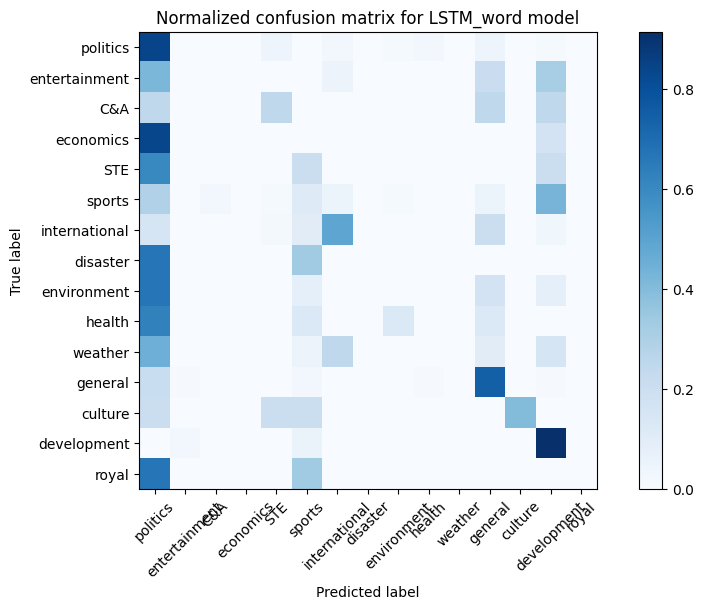

In [ ]:
np.argmax(y_nn_test, axis = -1)
y_true_plot = [num_2_genre_map[i] for i in np.argmax(y_nn_test, axis = -1)]
y_pred_plot = [num_2_genre_map[i] for i in y_word_nn_pred]

cnf_matrix = confusion_matrix(y_true_plot, y_pred_plot)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for LSTM_word model')

plt.show()

In [ ]:
LSTM_model_syl = get_lstm(syl_len, n_syl)
LSTM_model_syl.summary()

# LSTM_model_syl.load_weights('LSTM_model_syl_wt.h5')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 783)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 783, 64)           1064704   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 783, 100)          32100     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                1515      
Total params: 1,178,719
Trainable params: 1,178,719
Non-trainable params: 0
_________________________________________________________________


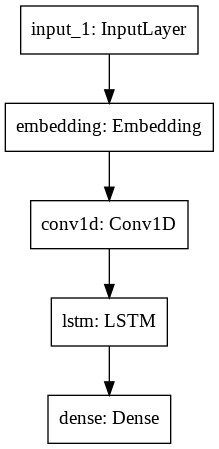

In [ ]:
plot_model(LSTM_model_word)

In [ ]:
t.tic()
LSTM_model_syl.fit(X_syl_nn_train, y_nn_train, epochs=epochs, batch_size=batch_size, verbose=1,
                           callbacks=callbacks_list_nn,
                           validation_data=(X_syl_nn_val, y_nn_val))
t.toc()

LSTM_model_syl.save_weights('LSTM_model_syl_wt.h5')

Epoch 1/10
119/119 [==============================] - 399s 3s/step - loss: 2.3028 - acc: 0.2882 - val_loss: 2.1466 - val_acc: 0.2905

Epoch 00001: val_loss did not improve from 1.76543
Epoch 2/10
119/119 [==============================] - 395s 3s/step - loss: 2.0651 - acc: 0.3279 - val_loss: 2.0674 - val_acc: 0.3158

Epoch 00002: val_loss did not improve from 1.76543
Epoch 3/10
119/119 [==============================] - 397s 3s/step - loss: 1.8895 - acc: 0.3697 - val_loss: 2.0693 - val_acc: 0.3137

Epoch 00003: val_loss did not improve from 1.76543
Epoch 4/10
119/119 [==============================] - 393s 3s/step - loss: 1.8101 - acc: 0.3812 - val_loss: 2.0252 - val_acc: 0.3389

Epoch 00004: val_loss did not improve from 1.76543
Epoch 5/10
119/119 [==============================] - 393s 3s/step - loss: 1.7017 - acc: 0.4182 - val_loss: 2.0013 - val_acc: 0.3853

Epoch 00005: val_loss did not improve from 1.76543
Epoch 6/10
119/119 [==============================] - 395s 3s/step - loss: 

In [ ]:
LSTM_model_syl.load_weights('LSTM_model_syl_wt.h5')
y_syl_nn_pred = LSTM_model_syl.predict(X_syl_nn_test)
y_syl_nn_pred = np.argmax(y_syl_nn_pred, axis = -1)

In [ ]:
print(accuracy_score(np.argmax(y_nn_test, axis = -1), y_syl_nn_pred))
print(f1_score(np.argmax(y_nn_test, axis = -1), y_syl_nn_pred, average='weighted'))

0.6113445378151261
0.5697919953384607


Normalized confusion matrix


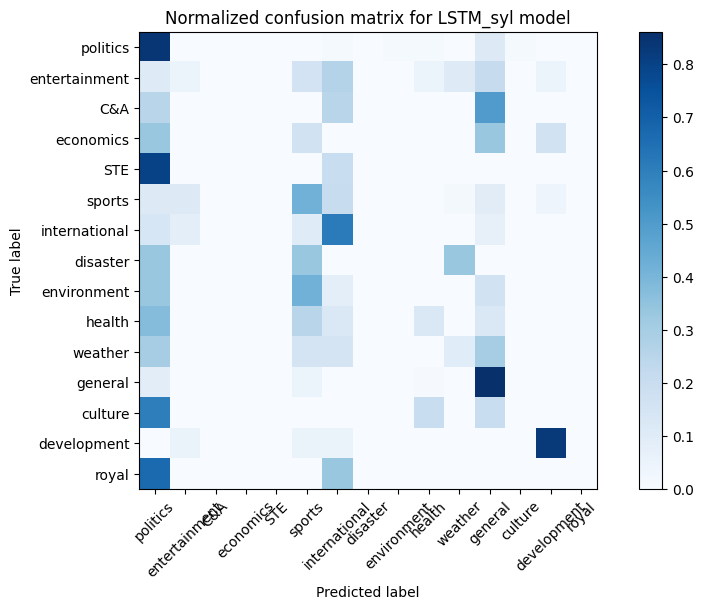

In [ ]:
np.argmax(y_nn_test, axis = -1)
y_true_plot = [num_2_genre_map[i] for i in np.argmax(y_nn_test, axis = -1)]
y_pred_plot = [num_2_genre_map[i] for i in y_syl_nn_pred]

cnf_matrix = confusion_matrix(y_true_plot, y_pred_plot)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for LSTM_syl model')

plt.show()

## 4. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def RF_pipeline():
  RF_pipeline = Pipeline([('vect', CountVectorizer(tokenizer=dummy, preprocessor=dummy)),
                         ('tfidf', TfidfTransformer()),
                         ('rf', RandomForestClassifier())])
  return RF_pipeline

#########

print('Start')
t.tic()
RF_pipeline_word = RF_pipeline()
RF_pipeline_word.fit(X_word_train, y_train)
t.toc()
print('End for RF_pipeline_word model')

t.tic()
RF_pipeline_syl = RF_pipeline()
RF_pipeline_syl.fit(X_word_train, y_train)
t.toc()
print('End for RF_pipeline_syl model')

Start
Elapsed time is 6.674583 seconds.
End for RF_pipeline_word model
Elapsed time is 6.642200 seconds.
End for RF_pipeline_syl model


In [ ]:
y_RF_word_predict = RF_pipeline_word.predict(X_word_test)
y_RF_syl_predict = RF_pipeline_syl.predict(X_word_test)

In [ ]:
print(accuracy_score(y_test, y_RF_word_predict))
print(f1_score(y_test, y_RF_word_predict, average='weighted'))

0.7710084033613446
0.7374903224809908


In [ ]:
print(accuracy_score(y_test, y_RF_syl_predict))
print(f1_score(y_test, y_RF_syl_predict, average='weighted'))

0.7647058823529411
0.727015279105255


Normalized confusion matrix


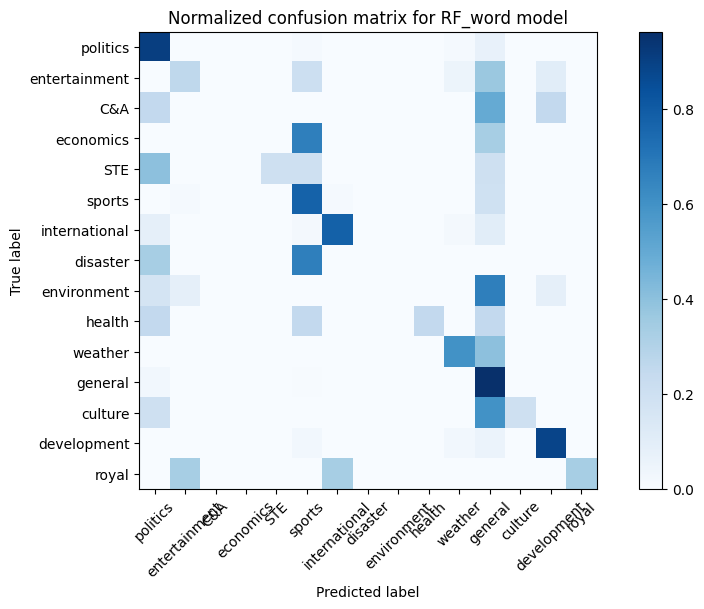

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_RF_word_predict)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for RF_word model')

plt.show()

Normalized confusion matrix


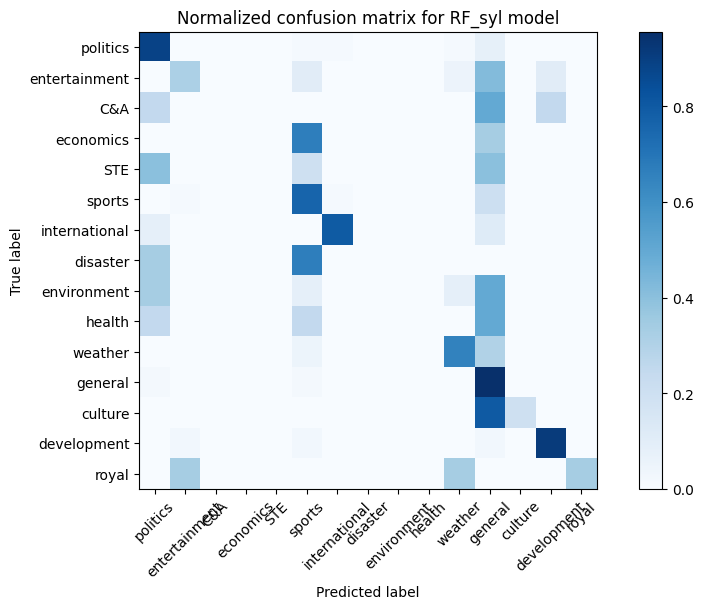

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_RF_syl_predict)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for RF_syl model')

plt.show()

## 5. XGBoost

In [ ]:
from xgboost import XGBClassifier

def XGB_pipeline():
  XGB_pipeline = Pipeline([('vect', CountVectorizer(tokenizer=dummy, preprocessor=dummy)),
                         ('tfidf', TfidfTransformer()),
                         ('xgb', XGBClassifier())])
  return XGB_pipeline

print('Start')
t.tic()
XGB_pipeline_word = XGB_pipeline()
XGB_pipeline_word.fit(X_word_train, y_train)
t.toc()
print('End for XGB_pipeline_word model')

t.tic()
XGB_pipeline_syl = XGB_pipeline()
XGB_pipeline_syl.fit(X_syl_train, y_train)
t.toc()
print('End for XGB_pipeline_syl model')

Start
Elapsed time is 159.689045 seconds.
End for XGB_pipeline_word model
Elapsed time is 159.457552 seconds.
End for XGB_pipeline_syl model


In [ ]:
y_XGB_word_predict = XGB_pipeline_word.predict(X_word_test)
y_XGB_syl_predict = XGB_pipeline_syl.predict(X_word_test)

In [ ]:
print(accuracy_score(y_test, y_XGB_word_predict))
print(f1_score(y_test, y_XGB_word_predict, average='weighted'))

0.8025210084033614
0.7803147451749751


In [ ]:
print(accuracy_score(y_test, y_XGB_syl_predict))
print(f1_score(y_test, y_XGB_syl_predict, average='weighted'))

0.6008403361344538
0.5706353447230752


Normalized confusion matrix


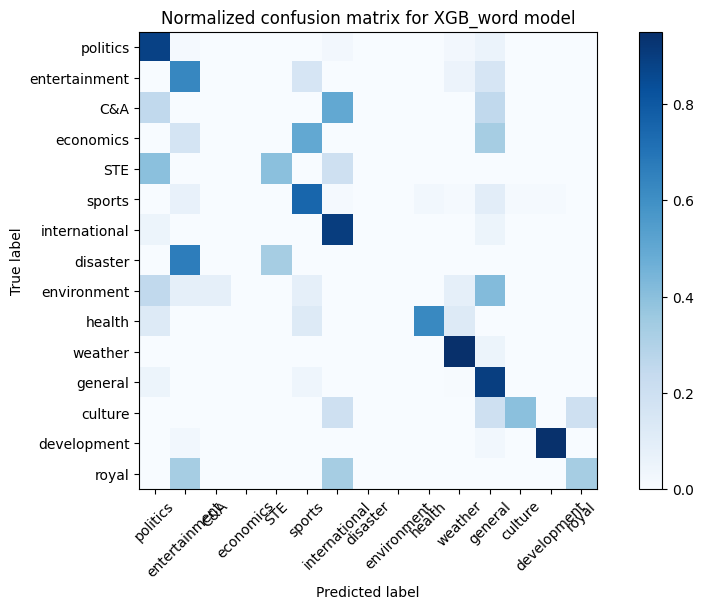

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_XGB_word_predict)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for XGB_word model')

plt.show()

Normalized confusion matrix


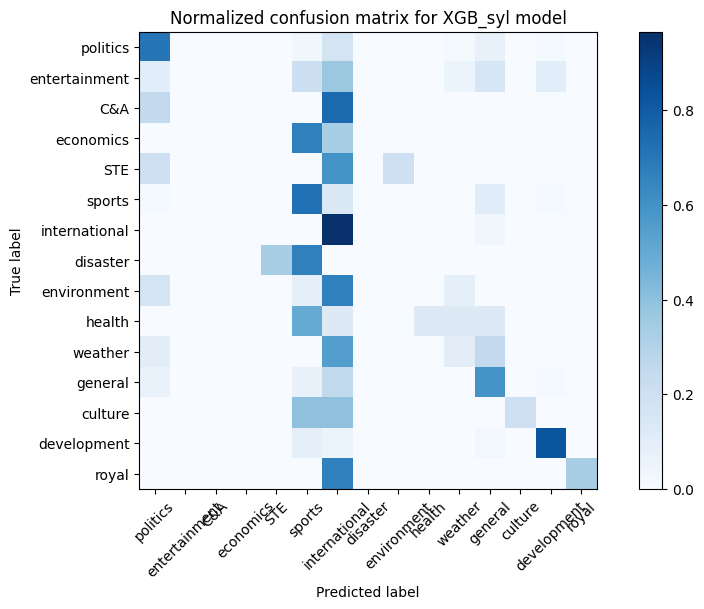

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_XGB_syl_predict)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for XGB_syl model')

plt.show()

# Investigation

In [ ]:
#economic, international, royal

data[data['genre'] == 'economics'][:20]

,Doc,filename,genre
4,ที่ประชุมสภาความมั่นคงแห่งชาติ เตรียมเสนอ ครม....,T13361.txt,economics
16,คลังเดินหน้ารีดภาษีที่ดินคนรวยพบคน 10% ถือเกิน...,T12544.txt,economics
18,รัฐบาลมั่นใจเสียงยังแน่น เร่งดัน กม.ภาษีสรรพสา...,T13394.txt,economics
24,เทเลนอร์ปลื้มผลงานตลาดเอเชีย นายจอน เฟรดริค บั...,T12772.txt,economics
29,"""เขาช่อง""ยกเครื่อง เร่งยอดขายเท่าตัว นายชนะ จิ...",T12601.txt,economics
43,"โนเกียทุบตลาดหั่นราคายกแผง 10% ลดบทบาท""โมเดิร์...",T12779.txt,economics
49,นายกฯ เตรียมสนับสนุนงบ กว่า 700 ล้านบาท สนับสน...,T12836.txt,economics
63,ปัดฝุ่นบ้านมั่นคงแก้ชุมชนแออัด รัฐตั้งเป้าหมาย...,T13317.txt,economics
70,ไซแมท-ทุนมาเลย์วิจัยร่วมระยะยาวลุยแวร์เฮ้าส์เอ...,T12708.txt,economics
152,ซินเน็คกินรวบคู่แข่งดันยอดโต 8% ซินเน็ค กินรวบ...,T12764.txt,economics


In [ ]:
def investigate(row):
  print(data.loc[row][0])
  print(data_word.loc[row][0])

In [ ]:
# import textwrap

# wrapper = textwrap.TextWrapper(width=40,
#     initial_indent=" " * 4,
#     subsequent_indent=" " * 4,
#     break_long_words=False,
#     break_on_hyphens=False)

In [ ]:
investigate(20)

ศาลรับรูดบัตรเครดิตประกันตัวคดีอาญา ศาลไฮเทครับบัตรเครดิตชำระแทนเงินสดในคดีอาญา ที่ศาลอาญา ศาลอาญากรุงเทพใต้ ศาลอาญาธนบุรี ศาลแขวงพระนครเหนือ เผยมีแค่บัตรเครดิตก็รูดประกันตัวได้ เตรียมขยายบริการทั่วประเทศ ด้านเลขาธิการสภาทนายความขานรับ ใช้บัตรเครดิตประกันตัวจำเลยหรือเสียค่าปรับได้ ระบุเป็นการเปิดช่องทางเพิ่ม และเป็นการอำนวยความสะดวกให้จำเลยในการได้รับอิสรภาพ นายสราวุธ เบญจกุล รองเลขาธิการสำนักงานศาลยุติธรรม เปิดเผยว่า ตามที่ศาลยุติธรรมเริ่มนำระบบบัตรเครดิต มาใช้กับการชำระค่าธรรมเนียมศาลในคดีแพ่งไปแล้วนั้น ศาลยุติธรรมยังเห็นว่า กรณีประชาชนที่ไม่สามารถนำเงินสดมาชำระค่าปรับในคดีอาญา หรือวางเงินสดประกันตัวผู้ต้องหาหรือจำเลย ทำให้เดือดร้อนต้องวิ่งยืมเงินหรือหาเช่าโฉนด บัดนี้ศาลยุติธรรมรับบัตรเครดิตชำระแทนเงินสดในคดีอาญาแล้ว อาทิเช่น ศาลอาญา ศาลอาญากรุงเทพใต้ ศาลอาญาธนบุรี ศาลแขวงพระนครเหนือดังนั้น จึงไม่ต้องกังวลอีกต่อไป เพียงมีบัตรเครดิตก็ใช้ได้ทันที และจะขยายบริการนี้ไปยังทุกศาลทั่วประเทศ เพื่อให้สอดคล้องกับนโยบายของนายวิรัช ลิ้มวิชัย ประธานศาลฎีกา ที่ต้องการให้ประชาชนได้รับบริการความยุติ

In [ ]:
unique_word = {}
for i in unique_class:
  unique_word[i] = len(set([w for s in data_word[data_word['genre'] == i]['Doc'] for w in s]))

print(unique_word)

{'politics': 19723, 'entertainment': 11385, 'C&A': 15847, 'economics': 12824, 'STE': 9662, 'sports': 10914, 'international': 7815, 'disaster': 5163, 'environment': 3866, 'health': 6290, 'weather': 2928, 'general': 6086, 'culture': 4514, 'development': 3882, 'royal': 9397}


# Suggestion

## Bigrams - Support Vector Machine (SVM)

In [ ]:
from sklearn import model_selection, naive_bayes, svm

In [ ]:
def SVM_2_pipeline():
  SVM_pipeline = Pipeline([('vect', CountVectorizer(tokenizer=dummy, preprocessor=dummy, ngram_range=(1, 2))),
                         ('tfidf', TfidfTransformer()),
                         ('svm', svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))])
  return SVM_pipeline

print('Start')
t.tic()
SVM_2_pipeline_word = SVM_2_pipeline()
SVM_2_pipeline_word.fit(X_word_train, y_train)
t.toc()
print('End for SVM_pipeline_word model')

t.tic()
SVM_2_pipeline_syl = SVM_2_pipeline()
SVM_2_pipeline_syl.fit(X_syl_train, y_train)
t.toc()
print('End for SVM_pipeline_syl model')

Start
Elapsed time is 103.277891 seconds.
End for SVM_pipeline_word model
Elapsed time is 99.382133 seconds.
End for SVM_pipeline_syl model


In [ ]:
y_SVM_2_word_predict = SVM_2_pipeline_word.predict(X_word_test)
y_SVM_2_syl_predict = SVM_2_pipeline_syl.predict(X_word_test)

In [ ]:
print(accuracy_score(y_test, y_SVM_2_word_predict))
print(f1_score(y_test, y_SVM_2_word_predict, average='weighted'))

0.819327731092437
0.792633327944631


In [ ]:
print(accuracy_score(y_test, y_SVM_syl_predict))
print(f1_score(y_test, y_SVM_syl_predict, average='weighted'))

0.7247899159663865
0.6809606258464801


Normalized confusion matrix


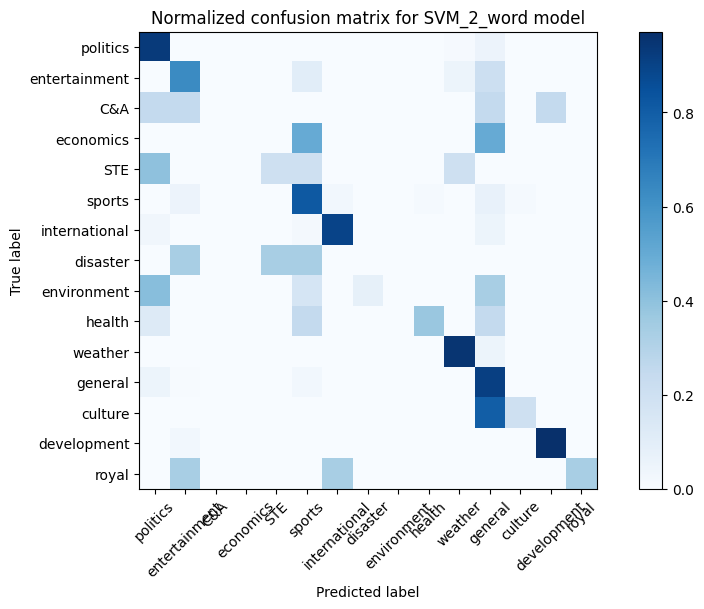

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_SVM_2_word_predict)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for SVM_2_word model')

plt.show()

Normalized confusion matrix


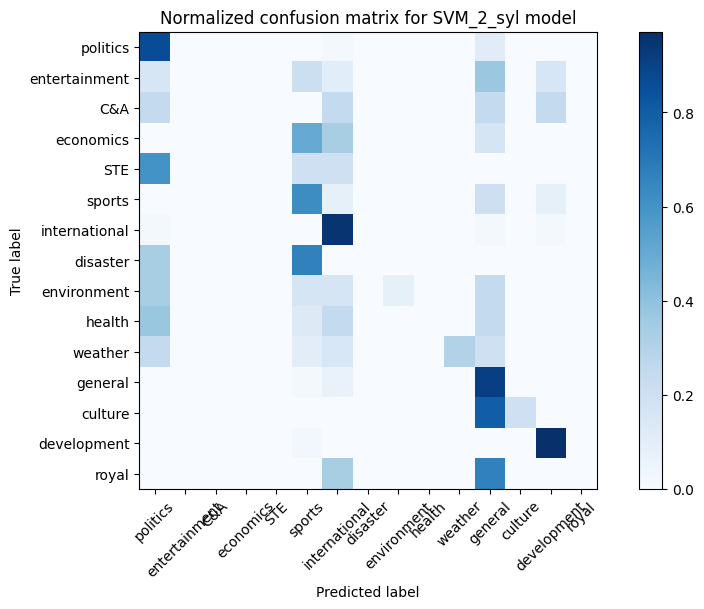

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_SVM_2_syl_predict)
plt.figure(figsize=(9,6))
plot_confusion_matrix(cnf_matrix, classes=unique_class, normalize=True,
                      title='Normalized confusion matrix for SVM_2_syl model')

plt.show()